In [1]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Load the data into a pandas DataFrame
df = pd.read_json('bulk_data_default_cards.json')

df.head()

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,attraction_lights,color_indicator,life_modifier,hand_modifier,printed_type_line,printed_text,content_warning,flavor_name,variation_of
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,65171.0,145764.0,301766.0,Siren Lookout,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,5664.0,Web,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(74412, 84)

In [4]:
# These are all the columns of our DataFrame and thus all the information provided for a Magic: The Gathering card
df.columns.values

array(['object', 'id', 'oracle_id', 'multiverse_ids', 'mtgo_id',
       'mtgo_foil_id', 'tcgplayer_id', 'cardmarket_id', 'name', 'lang',
       'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line',
       'oracle_text', 'power', 'toughness', 'colors', 'color_identity',
       'keywords', 'legalities', 'games', 'reserved', 'foil', 'nonfoil',
       'finishes', 'oversized', 'promo', 'reprint', 'variation', 'set_id',
       'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'flavor_text',
       'card_back_id', 'artist', 'artist_ids', 'illustration_id',
       'border_color', 'frame', 'full_art', 'textless', 'booster',
       'story_spotlight', 'edhrec_rank', 'penny_rank', 'prices',
       'related_uris', 'all_parts', 'promo_types', 'arena_id', 'preview',
       'security_stamp', 'produced_m

In [5]:
# Kick things off by taking a look at the most recent (as of 20.10.2022) set "Dominare United" (DMU)
dmu_df = df[df['set'] == 'dmu']

dmu_df.shape

(434, 84)

In [6]:
# As we can see, we end up with a DataFrame containing 434 rows (cards) which matches the set size found on Scryfall.
# "All good so far!" is what I'd like to say but lets inspect the DataFrame.
dmu_df[dmu_df['name'] == 'Jodah, the Unifier']

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,attraction_lights,color_indicator,life_modifier,hand_modifier,printed_type_line,printed_text,content_warning,flavor_name,variation_of
19024,card,416429e0-4b7e-43d1-8126-16ab679b6e39,490a8045-e160-4ccf-a05e-658ad2b7ac2d,[578055],NaN,NaN,283447.0,672432.0,"Jodah, the Unifier",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46422,card,9fb2313a-e002-4b37-9ecb-20bfe1799157,490a8045-e160-4ccf-a05e-658ad2b7ac2d,[577848],NaN,NaN,283462.0,672406.0,"Jodah, the Unifier",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66620,card,e4b1aa1e-b4e3-4346-8937-76b312501c70,490a8045-e160-4ccf-a05e-658ad2b7ac2d,[574683],102882.0,NaN,283614.0,672696.0,"Jodah, the Unifier",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# What's that? We got several copies of the same card! Though they all have different IDs so they are not the same?
# The thing is Magic: The Gathering started to have different prints of the same card in sets (fullart, special arts, etc.).
# One way to get rid of these multiples is to also look for the value in the 'booster' column to be true.
dmu_df = dmu_df[dmu_df['booster'] == True]

dmu_df.shape

(281, 84)

In [8]:
# With this we're down to 281 unique cards, which is in line with the official set size (can be found here: https://mtg.fandom.com/wiki/Dominaria_United)

In [9]:
dmu_df.colors.value_counts().index

Index([                       [],                     ['U'],
                           ['B'],                     ['W'],
                           ['G'],                     ['R'],
                      ['G', 'W'],                ['B', 'G'],
                      ['R', 'U'],                ['B', 'U'],
                      ['G', 'R'],                ['R', 'W'],
                      ['B', 'W'],                ['B', 'R'],
                      ['G', 'U'],                ['U', 'W'],
                 ['B', 'R', 'U'],           ['B', 'U', 'W'],
                 ['G', 'U', 'W'],           ['G', 'R', 'W'],
       ['B', 'G', 'R', 'U', 'W'],           ['B', 'G', 'R']],
      dtype='object')

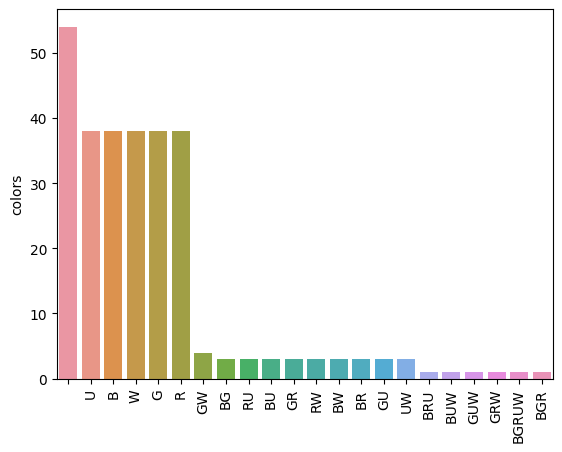

In [10]:
# Plot how many cards we got of each color / color combination

count_by_color = sns.barplot(x=[''.join(color for color in colors) for colors in dmu_df.colors.value_counts().index],
                 y=dmu_df.colors.value_counts())

for item in count_by_color.get_xticklabels():
    item.set_rotation(90)

In [11]:
# Oops! We really should remove 'Land' type cards when looking at the set (these count as colorless!)
dmu_df_no_lands = dmu_df[~dmu_df['type_line'].astype(str).str.contains('Land')]

dmu_df_no_lands.shape

(242, 84)

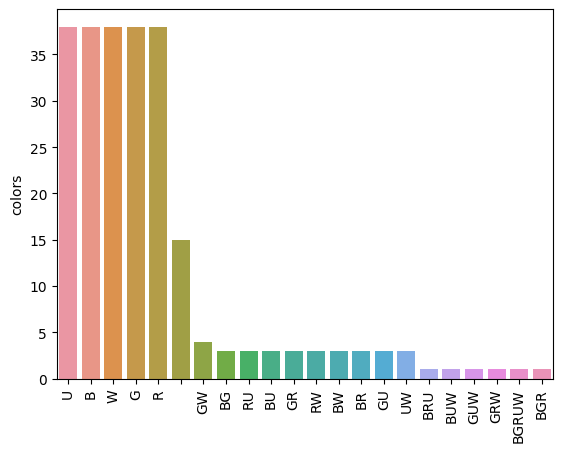

In [12]:
# Yep, this checks out! We have 20 Basic Lands and 19 Non-Basic Lands thus 242 + 20 + 19 = 281 which is the number of cards
# when filtered by set dmu and booster True. So let's plot the set again:
count_by_color = sns.barplot(x=[''.join(color for color in colors) for colors in dmu_df_no_lands.colors.value_counts().index],
                 y=dmu_df_no_lands.colors.value_counts())

for item in count_by_color.get_xticklabels():
    item.set_rotation(90)

In [13]:
# Wrap this up in a method..
def plot_card_count_by_color(set: str) -> None:
    set_df = df[(df['set'] == set) & (df['booster'] == True) & (~df['type_line'].astype(str).str.contains('Land'))]
    set_colors = set_df.colors.value_counts()
    count_by_color = sns.barplot(x=[''.join(color for color in colors) for colors in set_colors.index],
                                 y=set_colors)
    count_by_color.set(xlabel='Colors', ylabel='Count')
    for item in count_by_color.get_xticklabels():
        item.set_rotation(90)

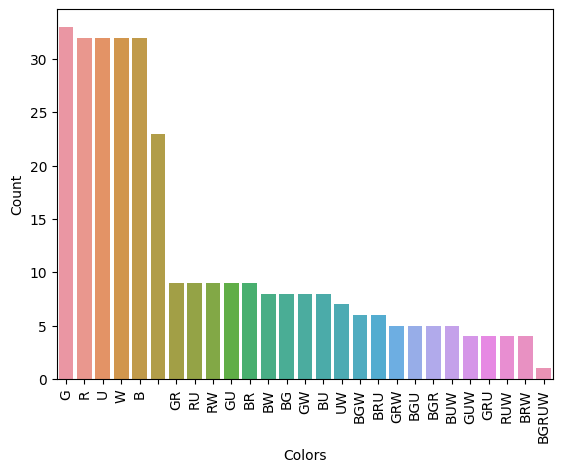

In [14]:
# ..and use it for all the sets you want to
plot_card_count_by_color('2x2')

In [15]:
# Now the question arises, apart from card count by color what else is there to look at in a single set?
# How about card cost by color? Maybe power and toughness of creature type cards?

# Same graph for mana value (converted mana cost) per card:
def plot_card_count_by_mv(set: str) -> None:
    # We still do not want Lands as they are cards with mana value (mv) of 0
    set_df = df[(df['set'] == set) & (df['booster'] == True) & (~df['type_line'].astype(str).str.contains('Land'))]
    set_cmcs = set_df.cmc.value_counts()
    count_by_cmc = sns.barplot(x=set_cmcs.index,
                                 y=set_cmcs)
    count_by_cmc.set(xlabel='Mana Cost', ylabel='Count')
    for item in count_by_cmc.get_xticklabels():
        item.set_rotation(90)

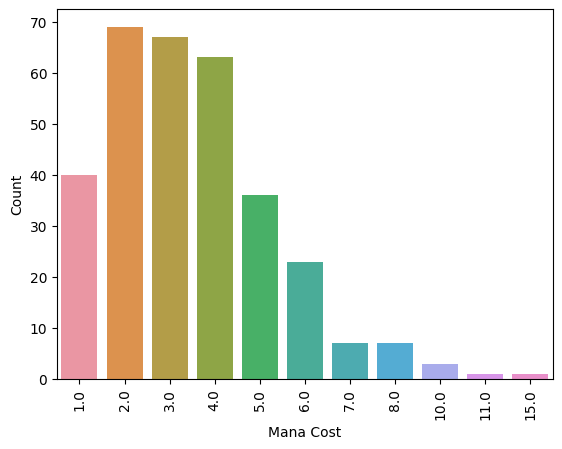

In [16]:
plot_card_count_by_mv('2x2')

In [17]:
# Average mv per color and throughout the whole set
def average_mv_by_color(set: str) -> list[float]:
    set_df = df[(df['set'] == set) & (df['booster'] == True) & (~df['type_line'].astype(str).str.contains('Land'))]
    set_df.loc[:, 'colors'] = set_df['colors'].apply(''.join)
    colors = set_df.colors.unique()
    d = {color: (set_df[set_df['colors'] == color]['cmc']).mean() for color in colors}
    mv_by_color = sns.barplot(x=list(d), y=list(d.values()))
    for item in mv_by_color.get_xticklabels():
        item.set_rotation(90)

C:\Users\Tim Eckle\AppData\Local\Temp\ipykernel_19568\2592603810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_df.loc[:, 'colors'] = set_df['colors'].apply(''.join)


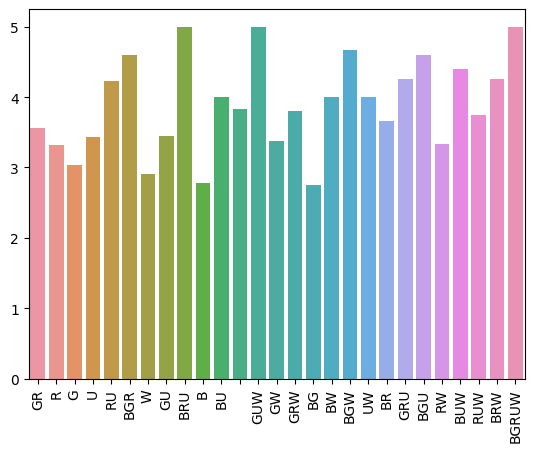

In [18]:
average_mv_by_color('2x2')